*** PCOS SEMINAR ***

*** DATA VISULIZATION AND PRE-PROCESSING ***

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
dataset= pd.read_csv('ASIS.csv')

In [2]:
print(dataset.shape)
dataset.describe().transpose()


(540, 11)


,count,mean,std,min,25%,50%,75%,max
PCOS,540.0,0.366667,0.482341,0.000,0.0000,0.00,1.000,1.000
Age (yrs),540.0,31.320370,5.717787,1.000,27.0000,31.00,35.000,48.000
BMI,540.0,24.906388,11.657040,13.387,21.8015,24.27,26.705,277.471
Cycle(R/I),540.0,0.296296,0.457047,0.000,0.0000,0.00,1.000,1.000
Weight gain(Y/N),540.0,0.411111,0.492492,0.000,0.0000,0.00,1.000,1.000
hairgrowth(Y/N),540.0,0.344444,0.475627,0.000,0.0000,0.00,1.000,1.000
Skin darkening (Y/N),540.0,0.350000,0.477412,0.000,0.0000,0.00,1.000,1.000
Hair loss(Y/N),540.0,0.427778,0.495215,0.000,0.0000,0.00,1.000,1.000
Pimples(Y/N),540.0,0.388889,0.487950,0.000,0.0000,0.00,1.000,1.000
Fast food (Y/N),540.0,0.414815,0.493147,0.000,0.0000,0.00,1.000,1.000


In [3]:
dataset["Age (yrs)"]=((dataset["Age (yrs)"]-dataset["Age (yrs)"].min())/(dataset["Age (yrs)"].max()-dataset["Age (yrs)"].min()))

In [4]:
dataset.sample(5)


,PCOS,Age (yrs),BMI,Cycle(R/I),Weight gain(Y/N),hairgrowth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N)
43,0,0.489362,26.483,0,0,0,0,0,0,0,0
315,0,0.574468,23.300,0,0,0,0,0,0,1,0
343,0,0.510638,32.800,1,1,0,0,1,0,0,0
310,0,0.808511,22.000,0,0,0,0,0,0,0,1
424,0,0.595745,20.400,0,0,0,0,1,0,0,1


In [2]:
dataset["BMI"]=((dataset["BMI"]-dataset["BMI"].min())/(dataset["BMI"].max()-dataset["BMI"].min()))

In [6]:
dataset.sample(5)

,PCOS,Age (yrs),BMI,Cycle(R/I),Weight gain(Y/N),hairgrowth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N)
38,1,0.744681,0.045133,1,0,1,0,1,0,1,0
370,1,0.574468,0.031100,0,1,1,1,1,0,0,1
214,0,0.595745,0.052563,0,1,0,1,0,0,1,0
155,0,0.531915,0.029964,1,0,1,0,0,0,0,0
232,0,0.723404,0.028665,1,0,0,0,0,0,0,0


In [7]:
print(dataset.shape)

(540, 11)


In [8]:
X = pd.DataFrame(dataset.iloc[:,:-1])
y =pd.DataFrame(dataset.iloc[:,-1])

In [9]:
dataset['PCOS'].value_counts()

0    342
1    198
Name: PCOS, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

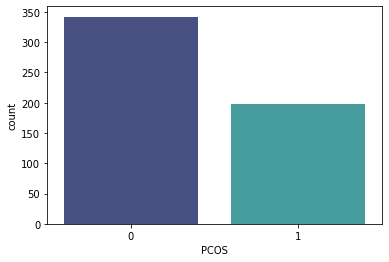

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='PCOS',data=dataset,palette='mako')
plt.show

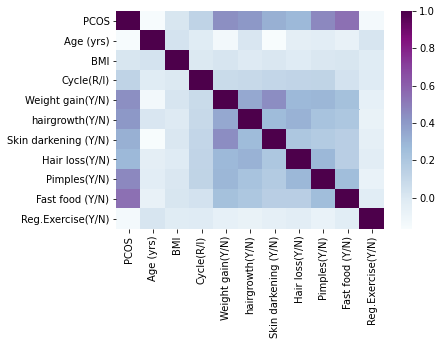

In [26]:
# Visualizing the data using heatmap
sns.heatmap(dataset.corr(), cmap="BuPu")
plt.show()

In [12]:
dataset.sample(5)

,PCOS,Age (yrs),BMI,Cycle(R/I),Weight gain(Y/N),hairgrowth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N)
205,1,0.574468,0.041016,0,1,1,1,0,1,1,0
216,1,0.744681,0.044535,0,1,1,0,1,0,1,0
196,1,0.723404,0.045859,0,1,1,0,1,1,1,0
24,1,0.702128,0.044868,0,1,1,0,1,1,1,0
242,0,0.765957,0.046667,1,1,1,1,0,0,0,0


In [7]:
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
dataset.drop(['Age (yrs)'], axis = 1)

,PCOS,BMI,Cycle(R/I),Weight gain(Y/N),hairgrowth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N)
0,1,0.022391,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0.043675,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.044997,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0,0.061674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,0.025268,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
535,0,0.065180,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
536,0,0.019361,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
537,0,0.045111,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
538,0,0.037916,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [14]:
print(dataset.shape)
dataset.describe().transpose()

(540, 11)


,count,mean,std,min,25%,50%,75%,max
PCOS,540.0,0.366667,0.482341,0.0,0.000000,0.000000,1.000000,1.0
Age (yrs),540.0,0.645114,0.121655,0.0,0.553191,0.638298,0.723404,1.0
BMI,540.0,0.043620,0.044141,0.0,0.031863,0.041210,0.050431,1.0
Cycle(R/I),540.0,0.296296,0.457047,0.0,0.000000,0.000000,1.000000,1.0
Weight gain(Y/N),540.0,0.411111,0.492492,0.0,0.000000,0.000000,1.000000,1.0
hairgrowth(Y/N),540.0,0.344444,0.475627,0.0,0.000000,0.000000,1.000000,1.0
Skin darkening (Y/N),540.0,0.350000,0.477412,0.0,0.000000,0.000000,1.000000,1.0
Hair loss(Y/N),540.0,0.427778,0.495215,0.0,0.000000,0.000000,1.000000,1.0
Pimples(Y/N),540.0,0.388889,0.487950,0.0,0.000000,0.000000,1.000000,1.0
Fast food (Y/N),540.0,0.414815,0.493147,0.0,0.000000,0.000000,1.000000,1.0


In [5]:
target_column = ['PCOS'] 
predictors = list(set(list(dataset.columns))-set(target_column))
dataset[predictors] = dataset[predictors]/dataset[predictors].max()
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PCOS,540.0,0.366667,0.482341,0.000000,0.000000,0.000000,1.000000,1.0
Age (yrs),540.0,0.652508,0.119121,0.020833,0.562500,0.645833,0.729167,1.0
BMI,540.0,0.043620,0.044141,0.000000,0.031863,0.041210,0.050431,1.0
Cycle(R/I),540.0,0.296296,0.457047,0.000000,0.000000,0.000000,1.000000,1.0
Weight gain(Y/N),540.0,0.411111,0.492492,0.000000,0.000000,0.000000,1.000000,1.0
hairgrowth(Y/N),540.0,0.344444,0.475627,0.000000,0.000000,0.000000,1.000000,1.0
Skin darkening (Y/N),540.0,0.350000,0.477412,0.000000,0.000000,0.000000,1.000000,1.0
Hair loss(Y/N),540.0,0.427778,0.495215,0.000000,0.000000,0.000000,1.000000,1.0
Pimples(Y/N),540.0,0.388889,0.487950,0.000000,0.000000,0.000000,1.000000,1.0
Fast food (Y/N),540.0,0.414815,0.493147,0.000000,0.000000,0.000000,1.000000,1.0


In [16]:
X = dataset[predictors].values
y = dataset[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=45)
print(X_train.shape); print(X_test.shape)

(432, 10)
(108, 10)


*** MLP MODEL ***

In [17]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(5,9,5), activation='relu', solver='adam', max_iter=1000)
mlp.fit(X_train,y_train.ravel())

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [18]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

[[257  21]
 [ 32 122]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       278
           1       0.85      0.79      0.82       154

    accuracy                           0.88       432
   macro avg       0.87      0.86      0.86       432
weighted avg       0.88      0.88      0.88       432



In [19]:
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

[[56  8]
 [10 34]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.86        64
           1       0.81      0.77      0.79        44

    accuracy                           0.83       108
   macro avg       0.83      0.82      0.83       108
weighted avg       0.83      0.83      0.83       108



*** DECISION TREE MODEL ***

In [21]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train.ravel())
predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

In [22]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

[[278   0]
 [  0 154]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       278
           1       1.00      1.00      1.00       154

    accuracy                           1.00       432
   macro avg       1.00      1.00      1.00       432
weighted avg       1.00      1.00      1.00       432



In [23]:
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))


[[59  5]
 [12 32]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87        64
           1       0.86      0.73      0.79        44

    accuracy                           0.84       108
   macro avg       0.85      0.82      0.83       108
weighted avg       0.84      0.84      0.84       108



[Text(175.88625000000002, 208.38, 'X[2] <= 0.5\ngini = 0.459\nsamples = 432\nvalue = [278, 154]'),
 Text(86.025, 190.26, 'X[9] <= 0.5\ngini = 0.257\nsamples = 257\nvalue = [218, 39]'),
 Text(36.27, 172.14, 'X[4] <= 0.5\ngini = 0.099\nsamples = 173\nvalue = [164, 9]'),
 Text(16.740000000000002, 154.01999999999998, 'X[1] <= 0.457\ngini = 0.052\nsamples = 149\nvalue = [145, 4]'),
 Text(7.44, 135.89999999999998, 'X[7] <= 0.047\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(3.72, 117.77999999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(11.16, 117.77999999999999, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(26.040000000000003, 135.89999999999998, 'X[7] <= 0.01\ngini = 0.04\nsamples = 147\nvalue = [144, 3]'),
 Text(18.6, 117.77999999999999, 'X[1] <= 0.649\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(14.88, 99.66, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(22.32, 99.66, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(33.480000000000004, 117.77999999999999, '

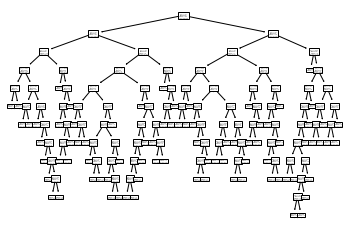

In [24]:
tree.plot_tree(clf) 

*** SVM MODEL ***

In [32]:
from sklearn import svm

clf = svm.SVC()
clf = clf.fit(X_train,y_train.ravel())
predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

In [33]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

[[263  15]
 [ 32 122]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       278
           1       0.89      0.79      0.84       154

    accuracy                           0.89       432
   macro avg       0.89      0.87      0.88       432
weighted avg       0.89      0.89      0.89       432



In [34]:
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

[[57  7]
 [10 34]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        64
           1       0.83      0.77      0.80        44

    accuracy                           0.84       108
   macro avg       0.84      0.83      0.84       108
weighted avg       0.84      0.84      0.84       108



*** NAIVE BAYES MODEL ***

In [43]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf = clf.fit(X_train,y_train.ravel())
predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

In [44]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

[[222  56]
 [ 25 129]]
              precision    recall  f1-score   support

           0       0.90      0.80      0.85       278
           1       0.70      0.84      0.76       154

    accuracy                           0.81       432
   macro avg       0.80      0.82      0.80       432
weighted avg       0.83      0.81      0.82       432



In [45]:
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

[[55  9]
 [ 3 41]]
              precision    recall  f1-score   support

           0       0.95      0.86      0.90        64
           1       0.82      0.93      0.87        44

    accuracy                           0.89       108
   macro avg       0.88      0.90      0.89       108
weighted avg       0.90      0.89      0.89       108



*** LOGISTIC REGRESSION MODEL ***

In [46]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf = clf.fit(X_train,y_train.ravel())
predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

In [47]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

[[254  24]
 [ 35 119]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       278
           1       0.83      0.77      0.80       154

    accuracy                           0.86       432
   macro avg       0.86      0.84      0.85       432
weighted avg       0.86      0.86      0.86       432



In [48]:
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

[[61  3]
 [ 8 36]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92        64
           1       0.92      0.82      0.87        44

    accuracy                           0.90       108
   macro avg       0.90      0.89      0.89       108
weighted avg       0.90      0.90      0.90       108



*** K-MEAN MODEL ***

In [55]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=2)
clf = clf.fit(X_train,y_train.ravel())
predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)


In [56]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

[[ 65 213]
 [128  26]]
              precision    recall  f1-score   support

           0       0.34      0.23      0.28       278
           1       0.11      0.17      0.13       154

    accuracy                           0.21       432
   macro avg       0.22      0.20      0.20       432
weighted avg       0.26      0.21      0.22       432



***random forest***

In [8]:
X = dataset[predictors].values
y = dataset[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=45)
dataset.drop(['Age (yrs)'], axis = 1)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf = clf.fit(X_train,y_train.ravel())
predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

 

In [9]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

[[278   0]
 [  0 154]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       278
           1       1.00      1.00      1.00       154

    accuracy                           1.00       432
   macro avg       1.00      1.00      1.00       432
weighted avg       1.00      1.00      1.00       432



In [10]:
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

[[56  8]
 [13 31]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        64
           1       0.79      0.70      0.75        44

    accuracy                           0.81       108
   macro avg       0.80      0.79      0.79       108
weighted avg       0.80      0.81      0.80       108



***K-nearest neighbours***

In [17]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors=10)
clf = clf.fit(X_train,y_train.ravel())
predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)



In [18]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

[[261  17]
 [ 38 116]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       278
           1       0.87      0.75      0.81       154

    accuracy                           0.87       432
   macro avg       0.87      0.85      0.86       432
weighted avg       0.87      0.87      0.87       432



In [19]:
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

[[58  6]
 [11 33]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87        64
           1       0.85      0.75      0.80        44

    accuracy                           0.84       108
   macro avg       0.84      0.83      0.83       108
weighted avg       0.84      0.84      0.84       108

